dataset:  https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree

In [ ]:
dataFrame = pd.read_csv( "sao-paulo-properties-april-2019.csv", index_col= False )
dataFrame

In [ ]:
dataFrame.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [ ]:
dataFrame.drop(['Condo', 'Property Type','Latitude','Longitude'], axis=1, inplace=True )
dataFrame

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type
0,930,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent
1,1000,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent
2,1000,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent
3,1000,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent
4,1300,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent
...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale
13636,545000,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale
13637,515000,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale
13638,345000,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale


In [ ]:
distritoOrdinalEncoder = OrdinalEncoder()
tipoNegociacaoOrdinalEncoder = OrdinalEncoder()

In [ ]:
dataFrame['District'] = distritoOrdinalEncoder.fit_transform(dataFrame['District'].values.reshape(-1, 1))
dataFrame['Negotiation Type'] = tipoNegociacaoOrdinalEncoder.fit_transform(dataFrame['Negotiation Type'].values.reshape(-1, 1))
dataFrame

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type
0,930,47,2,2,1,1,0,0,0,0,3.0,0.0
1,1000,45,2,2,1,1,0,0,0,0,3.0,0.0
2,1000,48,2,2,1,1,0,0,0,0,3.0,0.0
3,1000,48,2,2,1,1,0,0,0,0,3.0,0.0
4,1300,55,2,2,1,1,1,0,0,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,36.0,1.0
13636,545000,74,3,2,1,2,0,0,1,0,36.0,1.0
13637,515000,114,3,3,1,1,0,0,1,0,36.0,1.0
13638,345000,39,1,2,1,1,0,1,1,0,36.0,1.0


In [ ]:
df_rent = dataFrame[dataFrame['Negotiation Type'] != 1]
df_sale = dataFrame[dataFrame['Negotiation Type'] != 0]

In [ ]:
df_rent

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type
0,930,47,2,2,1,1,0,0,0,0,3.0,0.0
1,1000,45,2,2,1,1,0,0,0,0,3.0,0.0
2,1000,48,2,2,1,1,0,0,0,0,3.0,0.0
3,1000,48,2,2,1,1,0,0,0,0,3.0,0.0
4,1300,55,2,2,1,1,1,0,0,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,73,1,2,1,1,0,0,1,0,9.0,0.0
11206,21000,208,4,4,3,3,1,1,1,0,9.0,0.0
11207,3800,55,1,1,0,1,0,1,1,0,9.0,0.0
11208,5000,205,3,2,1,2,1,0,0,0,9.0,0.0


In [ ]:
df_sale

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type
4901,732600,74,1,2,1,2,1,0,1,0,88.0,1.0
4902,1990000,164,4,5,2,3,1,1,1,0,88.0,1.0
4903,720000,70,2,2,1,1,1,0,1,1,88.0,1.0
4904,1680000,155,3,5,3,2,1,0,1,0,88.0,1.0
4905,1200000,56,2,2,1,2,0,1,1,0,88.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,36.0,1.0
13636,545000,74,3,2,1,2,0,0,1,0,36.0,1.0
13637,515000,114,3,3,1,1,0,0,1,0,36.0,1.0
13638,345000,39,1,2,1,1,0,1,1,0,36.0,1.0


<Axes: >

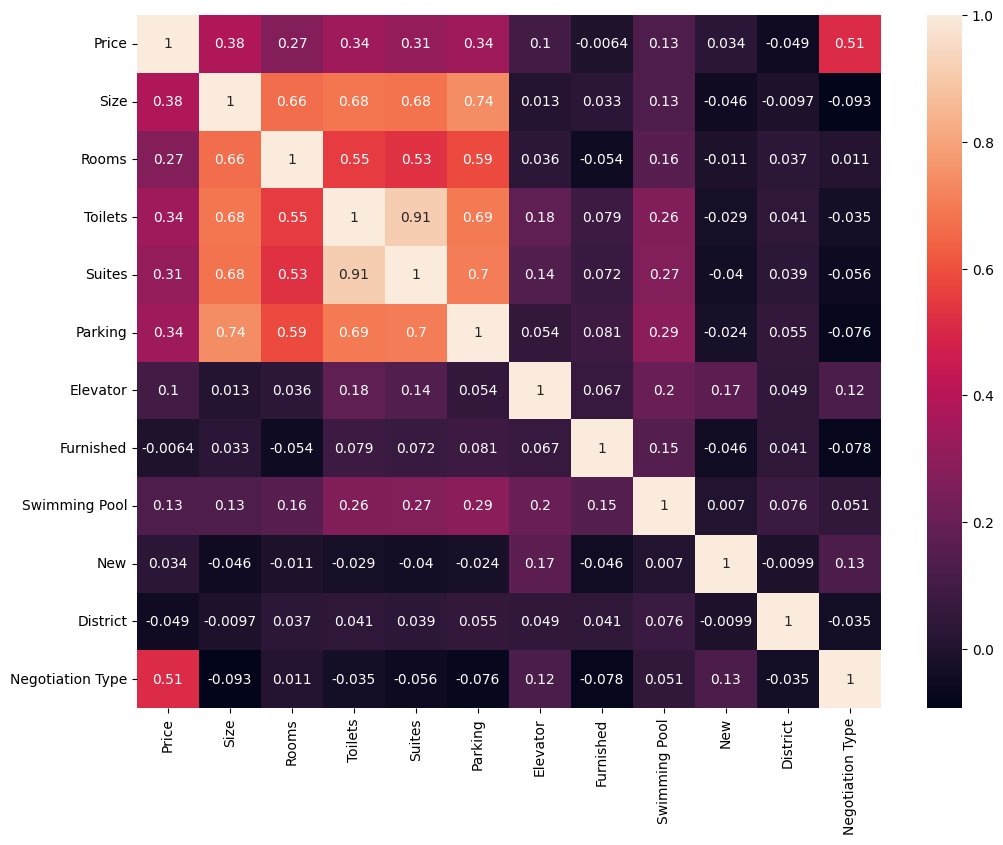

In [ ]:
a4_dim = (12, 9)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(dataFrame.corr(method = 'pearson'), annot = True )

Price               50000.0
Size                  598.0
Rooms                   4.0
Toilets                 7.0
Suites                  4.0
Parking                 6.0
Elevator                1.0
Furnished               0.0
Swimming Pool           1.0
New                     0.0
District                0.0
Negotiation Type        0.0
Name: 1589, dtype: float64

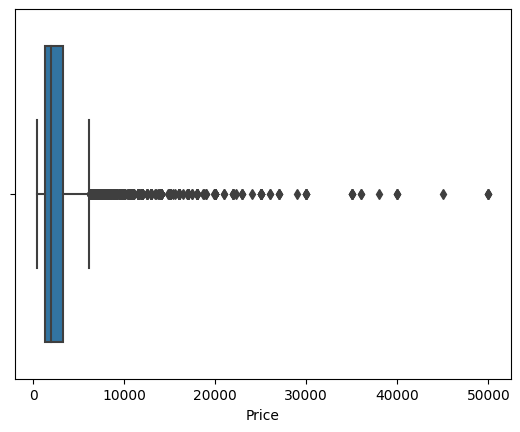

In [ ]:
sns.boxplot(x=df_rent['Price'])
df_rent['Price'].max()
indice_max_valor = df_rent['Price'].idxmax()
linha_max_valor = df_rent.loc[indice_max_valor]
linha_max_valor

Price               10000000.0
Size                     343.0
Rooms                      4.0
Toilets                    7.0
Suites                     4.0
Parking                    5.0
Elevator                   0.0
Furnished                  0.0
Swimming Pool              0.0
New                        0.0
District                  31.0
Negotiation Type           1.0
Name: 6282, dtype: float64

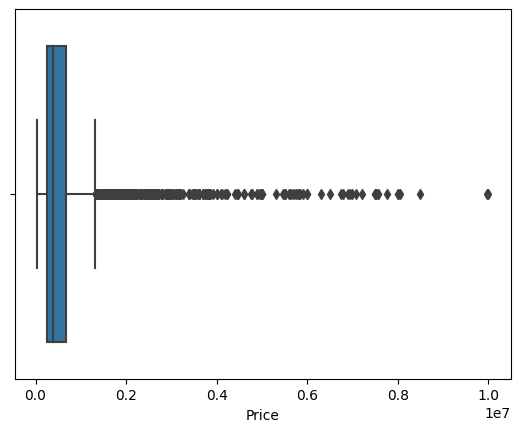

In [ ]:
sns.boxplot(x=df_sale['Price'])
df_sale['Price'].max()
indice_max_valor = df_sale['Price'].idxmax()
linha_max_valor = df_sale.loc[indice_max_valor]
linha_max_valor

In [ ]:
xInputR = df_rent.drop(['Price'], axis=1)
yOutputR = df_rent[['Price']]

In [ ]:
xInputS = df_rent.drop(['Price'], axis=1)
yOutputS = df_rent[['Price']]

In [ ]:
x_trainR, x_testR, y_trainR, y_testR = train_test_split(xInputR, yOutputR, test_size=0.3, random_state=50)

In [ ]:
x_trainS, x_testS, y_trainS, y_testS = train_test_split(xInputS, yOutputS, test_size=0.3, random_state=50)



---



In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Árvores de Decisão, SVR, KNN, Floresta ramdomica



In [ ]:
models = {
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
    "Random Forest": RandomForestRegressor(),
}

param_grids = {
    "SVR": {"C": [0.1, 1, 10, 15, 30], "gamma": ["scale", "auto"]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10, 15, 30], "min_samples_leaf": [1, 2, 4, 8]},
    "KNN": {"n_neighbors": [3, 5, 7, 10, 15, 30], "weights": ["uniform", "distance"]}
    "Random Forest": {"n_estimators": [10, 20, 50, 100], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10, 15, 30], "min_samples_leaf": [1, 2, 4, 8]},
}

In [ ]:
cv = KFold(n_splits=4, shuffle=True, random_state=0)

In [ ]:
resultsR = []
resultsS = []

In [ ]:
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
        error_score='raise'
    ).fit(x_trainR, y_trainR)
    result = {"model": name, "cv_results": pd.DataFrame(grid_search.cv_results_)}
    resultsR.append(result)

In [ ]:
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
        error_score='raise'
    ).fit(x_trainS, y_trainS)
    result = {"model": name, "cv_results": pd.DataFrame(grid_search.cv_results_)}
    resultsS.append(result)

In [ ]:
best_model_result_R = max(resultsR, key=lambda x: x['cv_results']['mean_test_score'].max())

In [ ]:
print("Aluguel")
print(f"Melhor modelo: {best_model_result_R['model']}")
print("Melhores hiperparâmetros:")
print(best_model_result_R['cv_results'][best_model_result_R['cv_results']['rank_test_score'] == 1].iloc[0]['params'])

Aluguel
Melhor modelo: Random Forest
Melhores hiperparâmetros:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_model_result_S = max(resultsS, key=lambda x: x['cv_results']['mean_test_score'].max())

In [ ]:
print("Venda")
print(f"Melhor modelo: {best_model_result_S['model']}")
print("Melhores hiperparâmetros:")
print(best_model_result_S['cv_results'][best_model_result_S['cv_results']['rank_test_score'] == 1].iloc[0]['params'])

Venda
Melhor modelo: Random Forest
Melhores hiperparâmetros:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [ ]:
best_modelR = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
best_modelR.fit(x_trainR, y_trainR)

<ipython-input-33-5dd214d7fd4b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_modelR.fit(x_trainR, y_trainR)


RandomForestRegressor(max_depth=30, n_estimators=50)

In [ ]:
best_modelS = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=20)
best_modelS.fit(x_trainS, y_trainS)

<ipython-input-34-df3ab5acbe1a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_modelS.fit(x_trainS, y_trainS)


RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=20)

In [ ]:
y_predR = best_modelR.predict(x_testR)
y_predS = best_modelS.predict(x_testS)

In [ ]:
maeR = mean_absolute_error(y_testR, y_predR)
rmseR = np.sqrt(mean_squared_error(y_testR, y_predR))

maeS = mean_absolute_error(y_testS, y_predS)
rmseS = np.sqrt(mean_squared_error(y_testS, y_predS))

In [ ]:
print("Aluguel")
print(f"Erro Médio Absoluto (MAE): {maeR:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmseR:.2f}")

Aluguel
Erro Médio Absoluto (MAE): 960.15
Raiz do Erro Quadrático Médio (RMSE): 2179.10


In [ ]:
print("Venda")
print(f"Erro Médio Absoluto (MAE): {maeS:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmseS:.2f}")

Venda
Erro Médio Absoluto (MAE): 977.96
Raiz do Erro Quadrático Médio (RMSE): 2245.62




---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import scatter_matrix

Graficos / dados

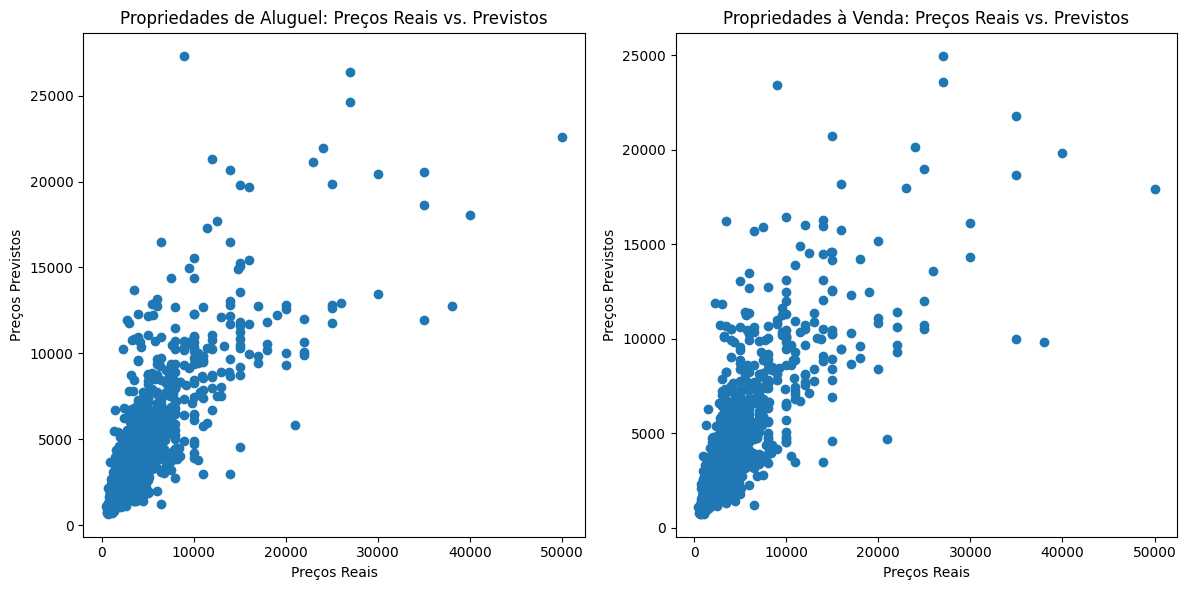

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_testR, y_predR)
plt.title('Aluguel: Preços Reais x Previstos')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')

plt.subplot(1, 2, 2)
plt.scatter(y_testS, y_predS)
plt.title('Venda: Preços Reais x Previstos')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')

plt.tight_layout()
plt.show()

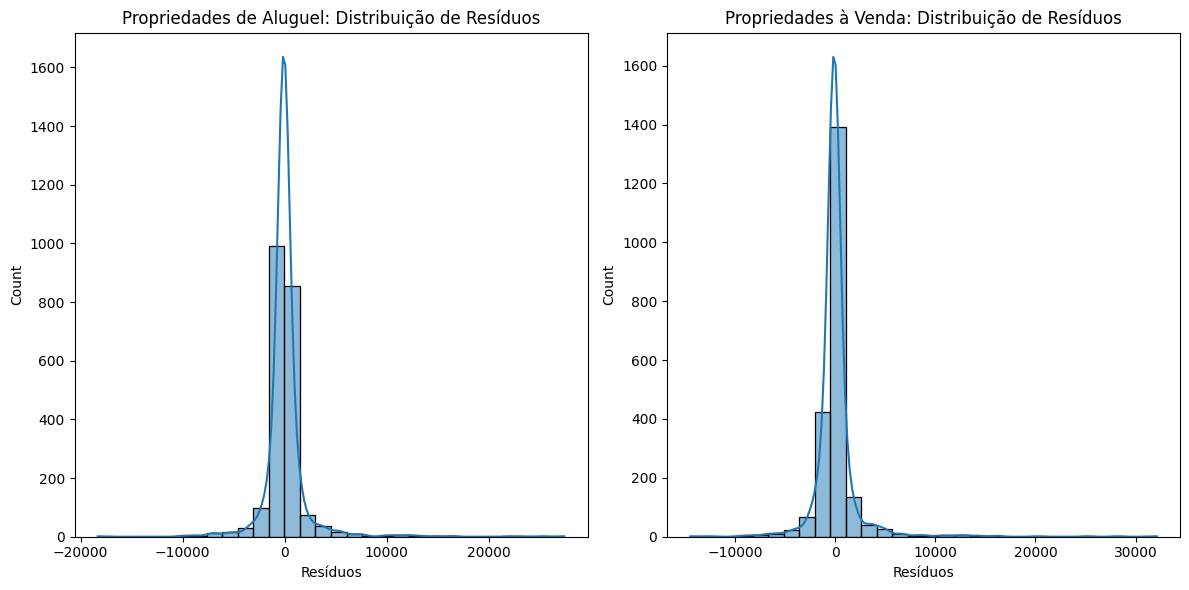

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_testR.squeeze() - y_predR, bins=30, kde=True)
plt.title('Aluguel: Erros de previsão')
plt.xlabel('Erros')

plt.subplot(1, 2, 2)
sns.histplot(y_testS.squeeze() - y_predS, bins=30, kde=True)
plt.title('Venda: Erros de previsão')
plt.xlabel('Erros')

plt.tight_layout()
plt.show()

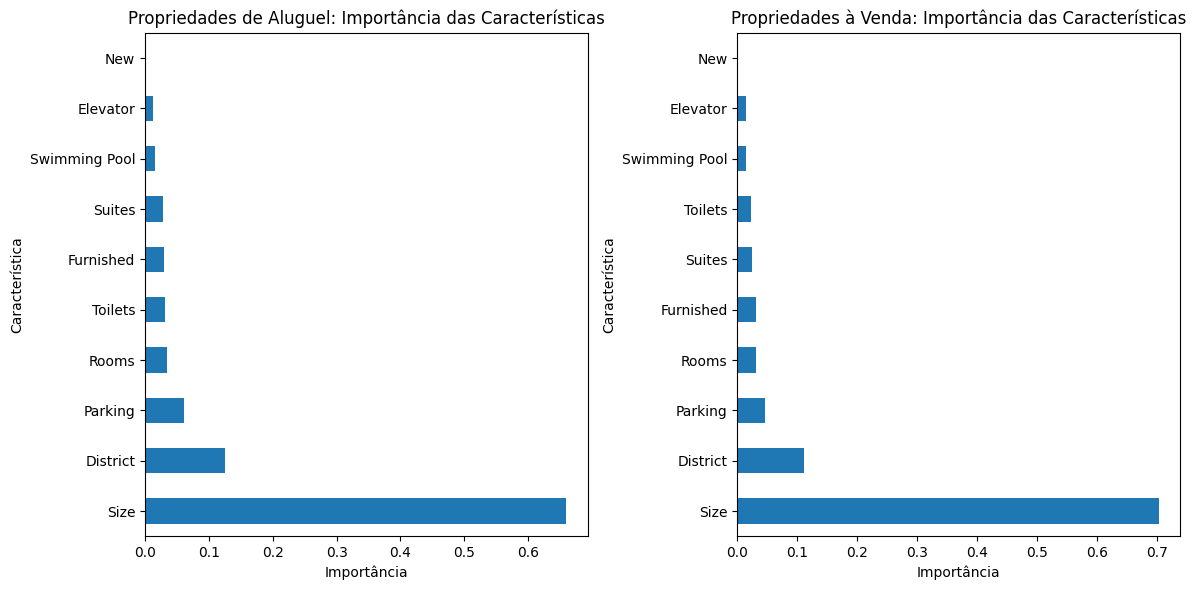

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feat_importances_R = pd.Series(best_modelR.feature_importances_, index=x_trainR.columns)
feat_importances_R.nlargest(10).plot(kind='barh')
plt.title('Aluguel: Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')

plt.subplot(1, 2, 2)
feat_importances_S = pd.Series(best_modelS.feature_importances_, index=x_trainS.columns)
feat_importances_S.nlargest(10).plot(kind='barh')
plt.title('Venda: Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')

plt.tight_layout()
plt.show()